In [84]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

### Asymptotic analysis of algorithms and big-O notation
This document provides a short exploration of asymptotic analysis of algorithms and big-O notation.

Asymptotic analysis is an approach to evaluating the performance of algorithms.

#### Let's see how it works:
Suppose you are testing two algorithms designed to find the sets of three non negative integers that sum to integer $n$.
Let's call them "Alice's algorithm" and "Bob's algorithm".

In [60]:
# Alice's algorithm
def alice_solution(n):
    solutions = []
    for a in range(n+1):
        for b in range(n+1):
            for c in range(n+1):
                if a + b + c == n:
                    solutions.append((a, b, c))
    return solutions

# Bob's algorithm
def bob_solution(n):
    solutions = []
    for a in range(n+1):
        for b in range(n+1):
            c = n - (a + b)
            if c >= 0:
                solutions.append((a, b, c))
    return solutions

How should we approach evaluating the efficiencies of these two algorithms to determine which is best for our purposes?

Whichever approach we may take, we need to evaluate the function for a distribution of input sizes - in other words, for
a selection of different conditions.

One approach might be to consider the time it takes to run each algorithm for different size inputs. Let's try that:

In [98]:
# Time-based evaluation function
def evaluate_time(function):
    inputs = list(range(1, 50))
    results = []
    for i in inputs:
        start = time.time()
        function(i)
        end = time.time()
        results.append(end - start)
    return results

df_time_evals = pd.DataFrame({
    "Alice's algorithm's performance":evaluate_time(alice_solution),
    "Bob's algorithm's performance":evaluate_time(bob_solution)
})

Consider this plot of the performance data for both algorithms:

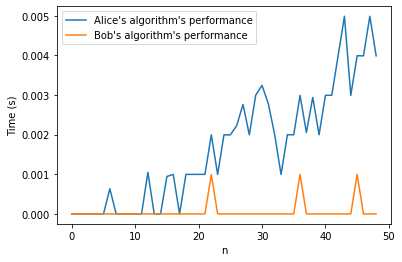

In [93]:
# plot_data function
def plot_data(data, xlab=None, ylab=None):
    df = pd.DataFrame(data)
    df.plot()
    if xlab is not None:
        plt.xlabel(xlab)
    if ylab is not None:
        plt.ylabel(ylab)
    plt.show()

plot_data(df_time_evals, "n", "Time (s)")

This is a good start, as we can start to see that for larger inputs, or in other words, larger values of $n$, Alice's
solution seems slower than Bob's.

The problem with this approach is that if we run this test on different machines, we might get different result due to
the differences in their hardware's capabilities. We need an approach which would be **machine-independent**.

One machine-independent option might be to count the number of steps performed running the algorithm. Let's try that
using adjusted versions of Alice and Bob's algorithms:

In [96]:
# Alice's adjusted algorithm
def alice_solution(n):
    steps = 0
    for a in range(n+1):
        for b in range(n+1):
            for c in range(n+1):
                steps += 1
                # if a + b + c == n:
                #     pass
    return steps

# Bob's adjusted algorithm
def bob_solution(n):
    steps = 0
    for a in range(n+1):
        for b in range(n+1):
            steps += 1
            # c = n - (a + b)
            # if c >= 0:
            #     pass
    return steps

# Step-based evaluation function
def evaluate_steps(function):
    inputs = list(range(1, 50))
    results = []
    for i in inputs:
        results.append(function(i))
    return results

df_steps_eval = pd.DataFrame({
    "Alice's algorithm's performance":evaluate_steps(alice_solution),
    "Bob's algorithm's performance":evaluate_steps(bob_solution)
})

Consider this plot of the performance data for both algorithms:

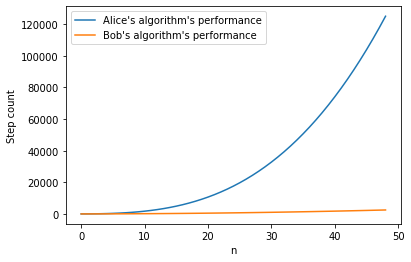

In [94]:
plot_data(df_steps_eval, "n", "Step count")

and consider this plot using $log(n)$ as the x-axis scale:

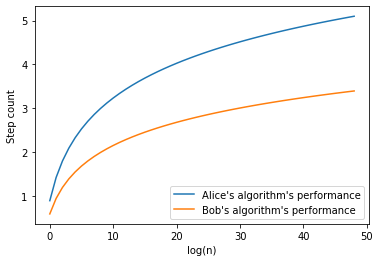

In [95]:
df_steps_eval_log = np.log10(df_steps_eval)
plot_data(df_steps_eval_log, "log(n)", "Step count")

This is an improvement, but computing the function for a distribution of values of n takes a lot of time and avoidable
work.

We can avoid this extra work and do better by going even further and **generalising the formula for the algorithm's
performance by generalising the step count for any input value of $n$.** Let's see how that looks:

For any $n$ value, Alice's algorithm runs $a$ times

$a = (n + 1) \cdot (n + 1) \cdot (n + 1)$ and $a = (n + 1) ^ 3$

For any n value, Bob's algorithm runs $b$ times

$b = (n + 1) \cdot (n + 1)$ and $b = (n + 1) ^ 2$

If we expand the the formulas for a and b, we get the following polynomials:

$a = n ^ 3 + n ^ 2 + 3 \cdot n + 1$ and $b = n ^ 2 + 2 \cdot n + 1$

Looking at these polynomials allows us to make yet another simplification to make things easier for us!

**One term in the polynomial accounts for the largest portion of the performance results** which are obtained using the
generalised performance formula for each algorithm (this is true for any continuous distribution of $n$).

In Alice's algorithm's performance polynomial formula, the dominating term is $n^3$, and in Bob's algorithm's performance
polynomial formula, it is $n^2$. Let's remember these terms and forget the rest.

We'll lose a little bit of technical accuracy in exchange for more clarity and simplicity.

We'll say that for Alice's algorithm, the perfomance is approximately $n^3$, and for Bob's, it is approximately $n^2$.

**Computer scientists use a special notation called big-O notation to express these approximations.** Using big-O notation,
we would write the last two statements about Alice's and Bob's algorithms as $\mathcal{O}(n^3)$ and $\mathcal{O}(n^2)$
respectively.

In big-O notation, we discard constants: Imagine a hypothetical third algorithm, Jamie's algorithm, for which the performance
formula in expanded polynomial form is $3 \cdot n^3 + n^2 + 2 \cdot n + 1$. The big-O form notation for this algorithm's
perforance would be $\mathcal{O}(n^3)$, because the $3 \cdot n^3$ term of the polynomial dominates the equation, and because we ignore
constants, which causes us to ignore $3$.